In [1]:
from google.colab import files
uploaded = files.upload()

Saving cap_curves_2025-06-30.xlsx to cap_curves_2025-06-30.xlsx


In [2]:
import pandas as pd

file = "cap_curves_2025-06-30.xlsx"
df = pd.read_excel(file, sheet_name=None)

df.keys()

dict_keys(['rate curves 2025-06-30'])

In [3]:
import pandas as pd

file = "cap_curves_2025-06-30.xlsx"

df = pd.read_excel(file, sheet_name="rate curves 2025-06-30")

df.head(20)

,tenor,swap rates,spot rates,discounts,forwards,flat vols,fwd vols
0,0.25,0.042353,0.042353,0.989523,NaN,NaN,NaN
1,0.50,0.040859,0.040852,0.979883,0.039351,0.156842,0.156842
2,0.75,0.039391,0.039372,0.971043,0.036414,0.180709,0.201708
3,1.00,0.038115,0.038083,0.962807,0.034217,0.204576,0.240464
4,1.25,0.036704,0.036653,0.955417,0.030938,0.242127,0.328341
5,1.50,0.035655,0.035590,0.948239,0.030280,0.268642,0.336521
6,1.75,0.034942,0.034868,0.941054,0.030542,0.285885,0.336809
7,2.00,0.034453,0.034374,0.933835,0.030919,0.295615,0.328654
8,2.25,0.034000,0.033916,0.926827,0.030248,0.299596,0.312413
9,2.50,0.033750,0.033665,0.919605,0.031414,0.299589,0.296022


In [8]:
import numpy as np
from scipy.stats import norm

row_3 = df[df["tenor"] == 3.0].iloc[0]

row_275 = df[df["tenor"] == 2.75].iloc[0]

K = row_3["swap rates"]
P = row_3["discounts"]
sigma = row_3["fwd vols"]
F = row_275["forwards"]

T = 2.75
delta = 0.25
N = 100

In [9]:
d1 = (np.log(F/K) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

price = N * delta * P * (K * norm.cdf(-d2) - F * norm.cdf(-d1))

price

np.float64(0.15027253254521272)

In [24]:
N = 100
delta = 0.25

K = df[df["tenor"] == 3.0].iloc[0]["swap rates"]

sigma = df[df["tenor"] == 3.0].iloc[0]["flat vols"]

floor_value = 0

rows = df[(df["tenor"] > 0.25) & (df["tenor"] <= 3.0)]

for _, row in rows.iterrows():

    T_payment = row["tenor"]
    T_expiry = T_payment - 0.25

    F = row["forwards"]
    P = row["discounts"]

    d1 = (np.log(F/K) + 0.5 * sigma**2 * T_expiry) / (sigma * np.sqrt(T_expiry))
    d2 = d1 - sigma * np.sqrt(T_expiry)

    floorlet = N * delta * P * (K * norm.cdf(-d2) - F * norm.cdf(-d1))

    floor_value += floorlet

floor_value

np.float64(1.3175550466703734)

In [25]:
import pandas as pd
from scipy.interpolate import interp1d

N = 100
delta = 0.25

row3 = df[df["tenor"] == 3.0].iloc[0]
K = row3["swap rates"]
sigma = row3["flat vols"]

forward_interp = interp1d(df["tenor"], df["forwards"], kind="linear", fill_value="extrapolate")

results = []

rows = df[(df["tenor"] >= 0.25) & (df["tenor"] <= 3.0)]

for _, row in rows.iterrows():
    T_payment = row["tenor"]

    if T_payment == 0.25:
        results.append((T_payment, 0.0))
        continue

    T_expiry = T_payment - delta
    F = float(forward_interp(T_expiry))
    P = row["discounts"]

    d1 = (np.log(F/K) + 0.5 * sigma**2 * T_expiry) / (sigma * np.sqrt(T_expiry))
    d2 = d1 - sigma * np.sqrt(T_expiry)

    floorlet = N * delta * P * (K * norm.cdf(-d2) - F * norm.cdf(-d1))

    results.append((T_payment, floorlet))

floor_table = pd.DataFrame(results, columns=["Tenor", "Floorlet Value"])

floor_table["Floorlet Value"] = floor_table["Floorlet Value"].map(lambda x: f"${x:0.4f}")

floor_table

,Tenor,Floorlet Value
0,0.25,$0.0000
1,0.50,$nan
2,0.75,$nan
3,1.00,$0.0555
4,1.25,$0.0873
5,1.50,$0.1342
6,1.75,$0.1505
7,2.00,$0.1543
8,2.25,$0.1564
9,2.50,$0.1700


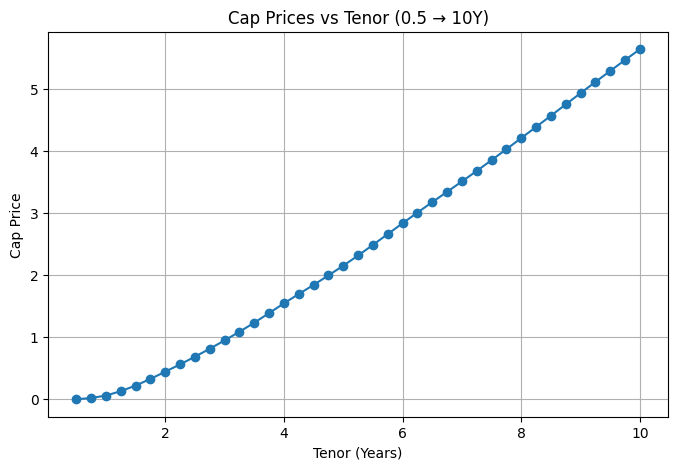

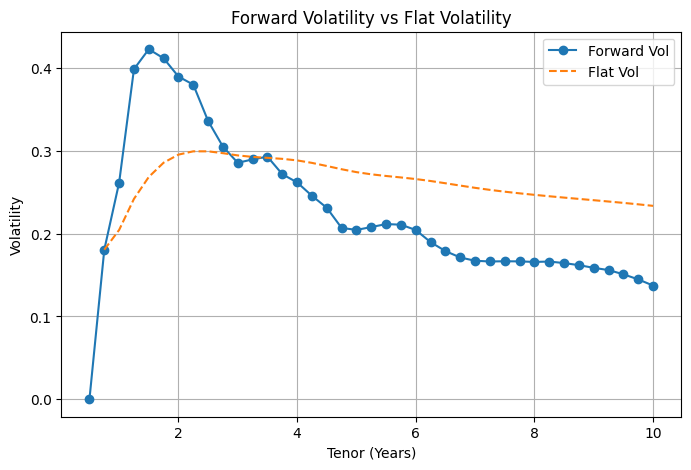

,Tenor,Cap Price,Caplet Price,Forward Vol
0,0.50,0.000000,0.000000,0.000000
1,0.75,0.019315,0.019315,0.180709
2,1.00,0.059633,0.040318,0.261713
3,1.25,0.129831,0.070198,0.398883
4,1.50,0.220659,0.090827,0.422990
5,1.75,0.327651,0.106992,0.412018
6,2.00,0.445035,0.117385,0.389942
7,2.25,0.562938,0.117902,0.380168
8,2.50,0.686694,0.123756,0.336250
9,2.75,0.814714,0.128020,0.305211


In [31]:
import matplotlib.pyplot as plt

N = 100
delta = 0.25

disc_interp = interp1d(df["tenor"], df["discounts"], kind="linear", fill_value="extrapolate")
swap_interp = interp1d(df["tenor"], df["swap rates"], kind="linear", fill_value="extrapolate")
flat_vol_interp = interp1d(df["tenor"], df["flat vols"], kind="linear", fill_value="extrapolate")

tenors_full = np.arange(0.5, 10.0 + delta, delta)

cap_prices_list = []
caplets_list = []
fwd_vols_list = []

for T_max in tenors_full:
    K = float(swap_interp(T_max))
    sigma_flat = max(float(flat_vol_interp(T_max)), 1e-6)

    T_steps = np.arange(delta, T_max + delta, delta)
    cap_value = 0
    for T_payment in T_steps:
        T_expiry = T_payment - delta
        if T_expiry <= 0.4:
            continue

        P = float(disc_interp(T_payment))
        P_start = float(disc_interp(T_payment - delta))
        F = max((P_start / P - 1) / delta, 1e-8)

        d1 = (np.log(F/K) + 0.5*sigma_flat**2 * T_expiry) / (sigma_flat * np.sqrt(T_expiry))
        d2 = d1 - sigma_flat * np.sqrt(T_expiry)
        caplet = N * delta * P * (F * norm.cdf(d1) - K * norm.cdf(d2))
        cap_value += caplet
    cap_prices_list.append((T_max, cap_value))

cap_prices_df = pd.DataFrame(cap_prices_list, columns=["Tenor", "Cap Price"])

for i, row in cap_prices_df.iterrows():
    if i == 0:
        caplet_price = row["Cap Price"]
    else:
        caplet_price = row["Cap Price"] - cap_prices_df.loc[i-1, "Cap Price"]
    caplets_list.append((row["Tenor"], caplet_price))

for i, (T, caplet_price) in enumerate(caplets_list):
    T_expiry = T - delta
    if T_expiry <= 0 or caplet_price <= 0:
        fwd_vols_list.append((T, 0.0))
        continue

    K = float(swap_interp(T))
    P = float(disc_interp(T))
    P_start = float(disc_interp(T - delta))
    F = max((P_start / P - 1) / delta, 1e-8)

    def black_price_error(sigma):
        sigma = max(sigma, 1e-6)
        d1 = (np.log(F/K) + 0.5*sigma**2*T_expiry)/(sigma*np.sqrt(T_expiry))
        d2 = d1 - sigma*np.sqrt(T_expiry)
        price = N * delta * P * (F * norm.cdf(d1) - K * norm.cdf(d2))
        return price - caplet_price

    sigma_fwd = brentq(black_price_error, 1e-6, 2.0)
    fwd_vols_list.append((T, sigma_fwd))

caplet_df = pd.DataFrame(caplets_list, columns=["Tenor", "Caplet Price"])
fwd_vol_df = pd.DataFrame(fwd_vols_list, columns=["Tenor", "Forward Vol"])

plt.figure(figsize=(8,5))
plt.plot(cap_prices_df["Tenor"], cap_prices_df["Cap Price"], marker='o')
plt.title("Cap Prices vs Tenor (0.5 → 10Y)")
plt.xlabel("Tenor (Years)")
plt.ylabel("Cap Price")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(fwd_vol_df["Tenor"], fwd_vol_df["Forward Vol"], label="Forward Vol", marker='o')
plt.plot(tenors_full, flat_vol_interp(tenors_full), label="Flat Vol", linestyle='--')
plt.title("Forward Volatility vs Flat Volatility")
plt.xlabel("Tenor (Years)")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()

cap_table = cap_prices_df.merge(caplet_df, on="Tenor").merge(fwd_vol_df, on="Tenor")
cap_table.head(20)